# Summary

Code below iterates through our training data, converts each image into an array and resizes them. Final output should be an array of arrays, with each pixel represented as numbers.

In [37]:
import os
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)

Populating the interactive namespace from numpy and matplotlib


## Compile Training Images

In [38]:
STANDARD_SIZE = (200, 100)
rootdir = 'C:\Users\Dallas\OneDrive\MSBA Program\Fall 2016 Courses\Adv Predictive Modeling\APM-Project\TrainImages'
labels = []
image_array = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        
        img = cv2.imread(os.path.join(subdir, file))
        #img = img[:,:,::-1] #Switch from RBG (default for OpenCV) to RGB
        img = cv2.resize(img,STANDARD_SIZE , interpolation = cv2.INTER_AREA)
        
        image_array.append(img)
        
        label = subdir.split(os.path.sep)[-1]

        label = (label, file)
        labels.append(label)

### Visualize & Check Images

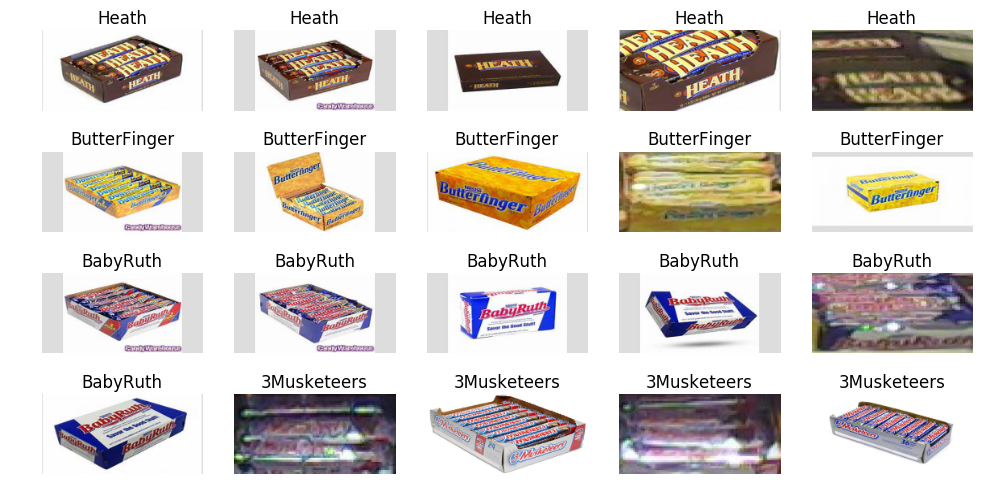

In [39]:
img_zip = zip(labels, image_array)

img_to_show = 20
thumb_size = (0,40)

for label, img in img_zip:
    if img_to_show < 1:
        break
        
    plt.subplot(4, 5, img_to_show)
    plt.axis('off')
    
    img = img[:,:,::-1]
    plt.imshow(img)
    plt.title(label[0])

    img_to_show -= 1
    
plt.show()

In [32]:
#Check Image Counts
lab_ser = pd.DataFrame(labels, columns=['product', 'img'])

lab_ser['product'].value_counts()

Tic Tac Wintergreen         16
Snickers                    10
Tic Tac Orange              10
m&m Peanut                   9
Hersheys Milk Chocolate      8
Tic Tac Freshmints           8
BabyRuth                     7
Twix                         7
Reeses                       7
mr. Goodbar                  7
Heath                        7
KitKat                       7
ButterFinger                 6
MilkyWay                     6
Hersheys Cookies N Creme     6
m&m Milk Chocolate           5
York                         5
3Musketeers                  4
Name: product, dtype: int64

## Compile Rack Images

In [40]:
rootdir = 'C:\Users\Dallas\OneDrive\MSBA Program\Fall 2016 Courses\Adv Predictive Modeling\APM-Project\RackImages'

rack_labels = []
rack_images = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        
        img = cv2.imread(os.path.join(subdir, file))
        #img = img[:,:,::-1] #Switch from RBG (default for OpenCV) to RGB
        img = cv2.resize(img,STANDARD_SIZE , interpolation = cv2.INTER_AREA)
        
        rack_images.append(img)
        
        label = subdir.split(os.path.sep)[-1]

        label = (label, file)
        rack_labels.append(label)

### Visualize & Check Images

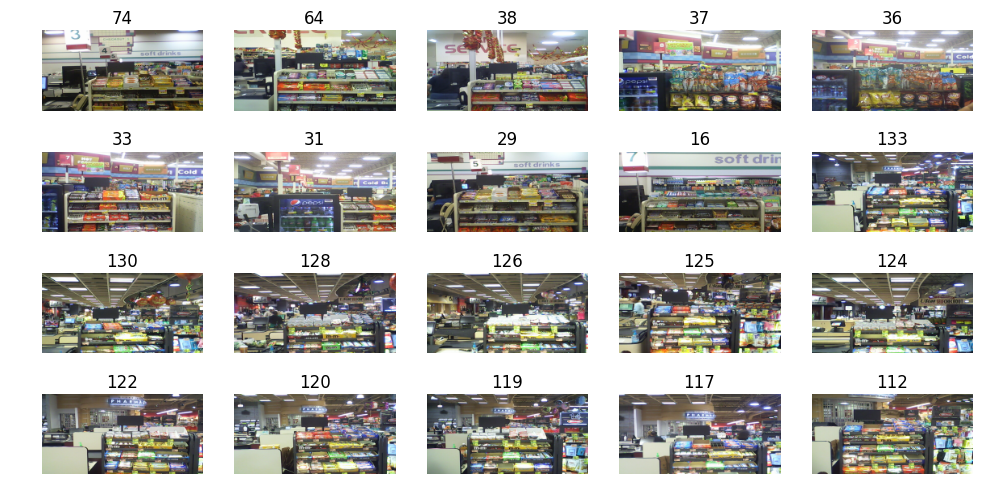

In [42]:
img_zip_rack = zip(rack_labels, rack_images)

img_to_show = 20
thumb_size = (0,40)

for label, img in img_zip_rack:
    if img_to_show < 1:
        break
        
    plt.subplot(4, 5, img_to_show)
    plt.axis('off')
    
    img = img[:,:,::-1]
    plt.imshow(img)
    plt.title(label[0])

    img_to_show -= 1
    
plt.show()